In [1]:
import os
import pandas as pd 
import numpy as np 
from pandas import read_csv
from pandas import datetime
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
pwd

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data Input

## Input and Transforms

In [3]:
series_x = read_csv('SteelMultivariateADS_SimilarMetals.csv', parse_dates=[1], index_col=0)

In [4]:
series_x.head()

,Steel,Al,Nickel
Date,,,
1-Jan-09,580,1448.74,11407.62
1-Feb-09,580,1367.93,10481.25
1-Mar-09,550,1373.02,9791.36
1-Apr-09,500,1458.65,11254.00
1-May-09,480,1497.39,12716.05


## Plot the Data

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


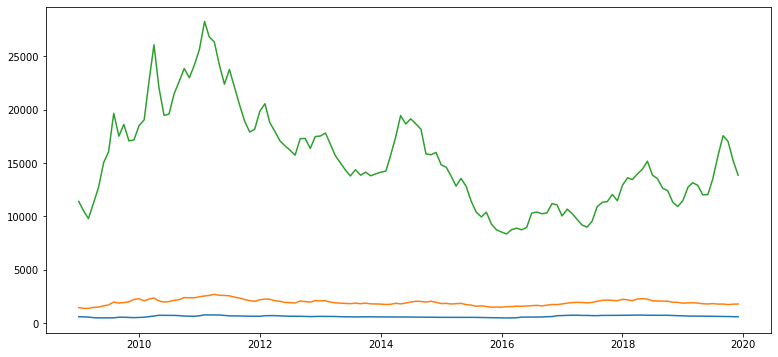

In [5]:
pyplot.figure(figsize = (13,6))
series_x = series_x.astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)
pyplot.plot(series_x)
pyplot.show()

In [6]:
series_x.dtypes

Steel     float64
Al        float64
Nickel    float64
dtype: object

## 2 Year Data Split

In [7]:
#creating the train and validation set
train_x = series_x[:108]
valid_x = series_x[108:]

In [8]:
len(valid_x)

24

## Build the Model

In [10]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_x.astype(float))
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_x))

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [13]:
#converting predictions to dataframe
cols = series_x.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [14]:
pred.dtypes

Steel     object
Al        object
Nickel    object
dtype: object

## MAPE Calculation

In [15]:
Steel = sum(abs((np.array(valid_x.iloc[:,[0]]) - np.array(pred.iloc[:,[0]])))/np.array(valid_x.iloc[:,[0]]))/24
print("Steel",Steel)
Alum = sum(abs((np.array(valid_x.iloc[:,[1]]) - np.array(pred.iloc[:,[1]])))/np.array(valid_x.iloc[:,[1]]))/24
print("Aluminium",Alum)
Nickel = sum(abs((np.array(valid_x.iloc[:,[2]]) - np.array(pred.iloc[:,[2]])))/np.array(valid_x.iloc[:,[2]]))/24
print("Nickel",Nickel)

Steel [0.04106669415694481]
Aluminium [0.0455592913370222]
Nickel [0.26892416440834865]


## 1 Year Data Split

In [16]:
#creating the train and validation set
train_x = series_x[:120]
valid_x = series_x[120:]

In [17]:
len(valid_x)

12

## Build the Model

In [18]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_x.astype(float))
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_x))

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [19]:
#converting predictions to dataframe
cols = series_x.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [20]:
pred.dtypes

Steel     object
Al        object
Nickel    object
dtype: object

## MAPE Calculation

In [21]:
Steel = sum(abs((np.array(valid_x.iloc[:,[0]]) - np.array(pred.iloc[:,[0]])))/np.array(valid_x.iloc[:,[0]]))/24
print("Steel",Steel)
Alum = sum(abs((np.array(valid_x.iloc[:,[1]]) - np.array(pred.iloc[:,[1]])))/np.array(valid_x.iloc[:,[1]]))/24
print("Aluminium",Alum)
Nickel = sum(abs((np.array(valid_x.iloc[:,[2]]) - np.array(pred.iloc[:,[2]])))/np.array(valid_x.iloc[:,[2]]))/24
print("Nickel",Nickel)

Steel [0.027741158190096413]
Aluminium [0.02680792575135328]
Nickel [0.10495128519803927]
